In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from sklearn.model_selection import train_test_split

In [21]:
train_dir = "../input/emotion-detection-fer/train" #passing the path with training images
test_dir = "../input/emotion-detection-fer/test"   #passing the path with testing images

In [22]:
img_size = 48 #original size of the image

In [23]:
"""
Data Augmentation
--------------------------
rotation_range = rotates the image with the amount of degrees we provide
width_shift_range = shifts the image randomly to the right or left along the width of the image
height_shift range = shifts image randomly to up or below along the height of the image
horizontal_flip = flips the image horizontally
rescale = to scale down the pizel values in our image between 0 and 1
zoom_range = applies random zoom to our object
validation_split = reserves some images to be used for validation purpose
"""

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
test_datagen = ImageDataGenerator(rescale = 1./255)



In [24]:
"""
Applying data augmentation to the images as we read 
them from their respectivve directories
"""
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=False  # 평가에서는 섞지 않음
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [25]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [26]:
epochs = 60
batch_size = 64

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      

In [28]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/60
359/359 [==============================] - 65s 179ms/step - loss: 9.6083 - accuracy: 0.1803 - val_loss: 8.4996 - val_accuracy: 0.2172
Epoch 2/60
359/359 [==============================] - 31s 87ms/step - loss: 8.5576 - accuracy: 0.2207 - val_loss: 7.6466 - val_accuracy: 0.2628
Epoch 3/60
359/359 [==============================] - 32s 88ms/step - loss: 7.5912 - accuracy: 0.2462 - val_loss: 6.6556 - val_accuracy: 0.3168
Epoch 4/60
359/359 [==============================] - 32s 89ms/step - loss: 6.6492 - accuracy: 0.2695 - val_loss: 5.8257 - val_accuracy: 0.3322
Epoch 5/60
359/359 [==============================] - 32s 90ms/step - loss: 5.7412 - accuracy: 0.2979 - val_loss: 4.9154 - val_accuracy: 0.3780
Epoch 6/60
359/359 [==============================] - 32s 88ms/step - loss: 4.9443 - accuracy: 0.3368 - val_loss: 4.3063 - val_accuracy: 0.3905
Epoch 7/60
359/359 [==============================] - 32s 88ms/step - loss: 4.2623 - accuracy: 0.3639 - val_loss: 3.7944 - val_accuracy

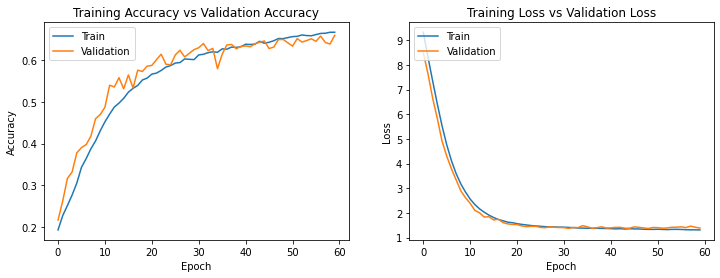

In [29]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [30]:
model.save('model_optimal.h5')

(48, 48)


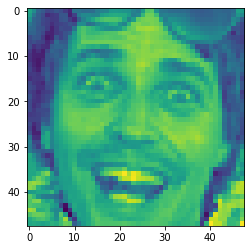

In [31]:
img = image.load_img("../input/emotion-detection-fer/test/happy/im1021.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [34]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [33]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 0.0, 1.4662322e-34, 1.0, 0.0, 0.0, 7.070386e-27]


In [36]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [37]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

113/113 [==============================] - 57s 508ms/step - loss: 1.3850 - accuracy: 0.6498
final train accuracy = 72.08 , validation accuracy = 64.98


In [60]:
model.save_weights('model_weights.h5')

In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# 이미지 전처리 함수
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(img_size, img_size), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    img_array = img_array / 255.0  # 정규화
    return img_array

# 예측 함수 정의
def predict_image(model, image_path):
    img_array = preprocess_image(image_path)

    # 예측 실행
    model_output = model.predict(img_array)  # TensorFlow/Keras 모델에서 예측

    predicted_class = np.argmax(model_output, axis=1)  # 예측된 클래스 인덱스
    return predicted_class[0]  # 예측된 클래스 반환

(351, 338, 3)


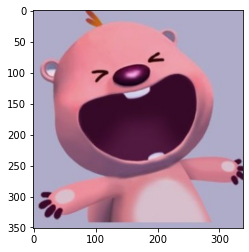

In [73]:
img = image.load_img("/kaggle/input/loopie/4.jpg")
img = np.array(img)
plt.imshow(img)
print(img.shape)

Predicted class: 3


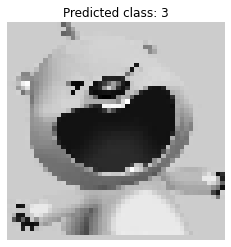

In [74]:
# 이미지 경로 설정
new_image_path = "/kaggle/input/loopie/4.jpg"  # 예측할 이미지의 경로

# 예측 실행
predicted_class = predict_image(model, new_image_path)

# 예측 결과 출력
print(f"Predicted class: {predicted_class}")

# 예측한 이미지 시각화
img = image.load_img(new_image_path, target_size=(img_size, img_size), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.axis('off')  # 축 표시 비활성화
plt.title(f"Predicted class: {predicted_class}")
plt.show()